# Testing Transport and EOS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from constants import *
from physics import JT_GMS, SMT

from pandas import read_csv
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Transport Coefficients

## Conductivity

#### Carbon from TCCW
We first test our conductivity via comparison with results from TCCW
### "Review of the first charged-particle transport coefficient comparison workshop"
Grabowski et al.


#### The following plot is for $\rho=1$ g/cc

In [2]:
Te = np.geomspace(0.1,1e5)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12

m_i = m_p*A

rho = 1e0*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

ke_tccw_rho1_data = read_csv("/home/zach/plasma/datasets/tccw-1/ke_rho_1e0-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [1.45620556 1.45724953 1.45861413 1.46039694 1.46272466 1.46576131
 1.46971858 1.47486852 1.48155883 1.49023102 1.50144108 1.51588263
 1.53441199 1.55807636 1.58814966 1.62619086 1.67416074 1.73467245
 1.8115091  1.91058363 2.04138363 2.21820467 2.45864341 2.77545442
 3.16310097 3.5920403  4.0207827  4.41445493 4.75388242 5.03400331
 5.2584137  5.43461397 5.57107271 5.67575166 5.75551584 5.81600576
 5.86172128 5.89618462 5.92211775 5.9416057  5.95623568 5.96721055
 5.97543897 5.98160569 5.98622589 5.98968661 5.99227839 5.99421917
 5.99567232 5.99676028]


Below we see agreement between SMT and JT_GMS models at very high T, well above the region TCCW probed. The behaviour difference is essentially due to the extremely small $\rm{ln}\Lambda$ parameter, which at the far left of this graph is $\sim 10^{-3}$, representing such strong screening that the idea of a Debye screening length must be completely broken. 

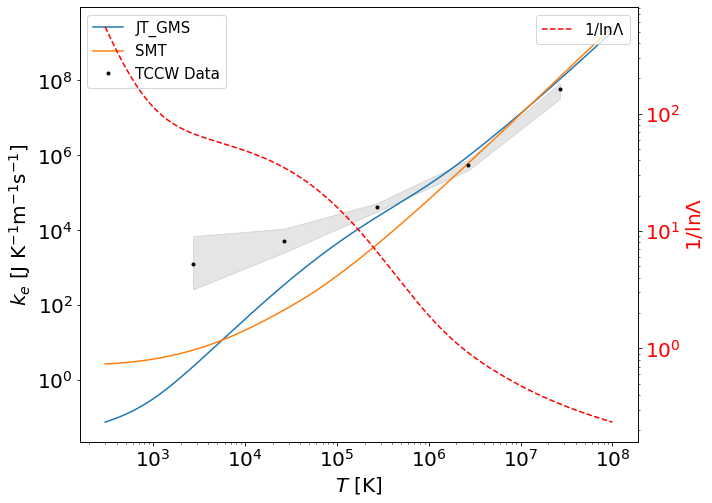

In [30]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.tick_params(labelsize=20)

ax.legend(fontsize=15)

# ax.grid()

#### The following plot is for $\rho=1$ g/cc

In [4]:
Te = np.geomspace(0.1,1e6)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12
m_i = m_p*A

rho = 1e2*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3

Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)


ke_tccw_rho1_data = read_csv("/home/zach/plasma/datasets/tccw-1/ke_rho_1e2-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [4.29830777 4.29831276 4.29831959 4.29832894 4.29834174 4.29835928
 4.2983833  4.29841619 4.29846124 4.29852298 4.29860764 4.29872393
 4.29888417 4.29910641 4.29941858 4.29986777 4.30054298 4.30163313
 4.30357977 4.30747906 4.31611577 4.33642487 4.38413975 4.48688997
 4.66849961 4.91137453 5.16082553 5.37548896 5.54370221 5.66975975
 5.76223445 5.82934181 5.87774817 5.91253821 5.93748359 5.95534198
 5.96811292 5.9772388  5.98375649 5.98840965 5.99173078 5.99410073
 5.99579169 5.99699808 5.9978587  5.99847262 5.99891054 5.99922291
 5.99944572 5.99960465]


Now repeated for a lower density, we see a similar issue

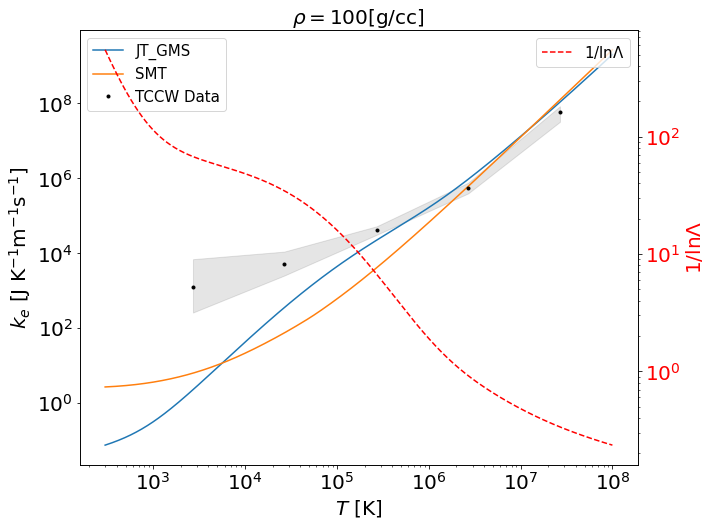

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.tick_params(labelsize=20)
ax.legend(fontsize=15)
ax.set_title(r'$\rho=100$[g/cc]',fontsize=20)

ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

# ax.grid()

### Argon for CLAMS Experiment

We repeat, but for parameters of interest to CLAMS

In [6]:
Te = np.geomspace(300, 1e8,num=1000) #K
Ti = Te #K

Z, A = 18, 40

m_i = m_p*A

n_i = 6.3e26
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

Zstar is:  [ 0.22453552  0.22484904  0.22516616  0.2254869   0.22581132  0.22613945
  0.22647133  0.22680701  0.22714651  0.22748988  0.22783717  0.22818842
  0.22854366  0.22890294  0.2292663   0.22963379  0.23000545  0.23038133
  0.23076146  0.23114589  0.23153467  0.23192785  0.23232546  0.23272756
  0.23313419  0.23354541  0.23396125  0.23438177  0.23480701  0.23523703
  0.23567187  0.23611158  0.23655621  0.23700582  0.23746046  0.23792017
  0.23838501  0.23885503  0.23933028  0.23981082  0.24029671  0.24078798
  0.24128471  0.24178695  0.24229474  0.24280816  0.24332724  0.24385206
  0.24438267  0.24491912  0.24546148  0.2460098   0.24656414  0.24712457
  0.24769114  0.24826392  0.24884296  0.24942833  0.25002009  0.25061831
  0.25122304  0.25183435  0.2524523   0.25307697  0.25370841  0.25434669
  0.25499188  0.25564404  0.25630324  0.25696955  0.25764304  0.25832378
  0.25901183  0.25970727  0.26041017  0.26112059  0.26183862  0.26256431
  0.26329775  0.26403901  0.26478816  0.

We see an identical issue here, with agreement only well above the region we are interested in. One could say CLAMS 'favors' JT_GMS here, but really this is probably accidental, since the two models should be at least close. I still can't rule out a bug.

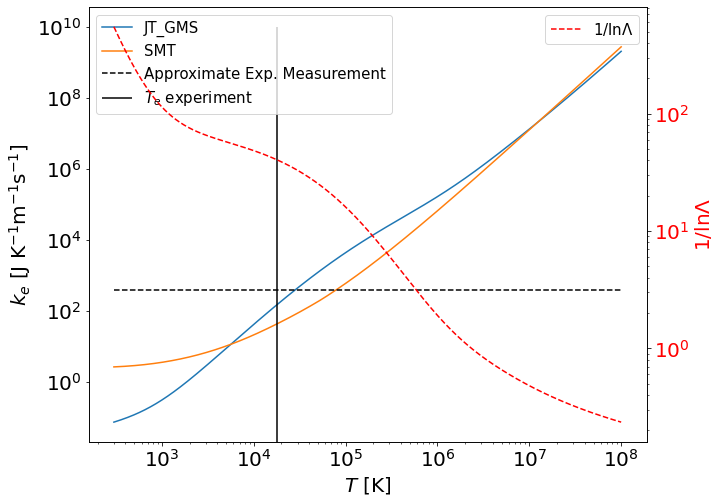

In [26]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='SMT')

dTdt_exp, Te_exp = 350e9, 18000 # 350 K/ns
τdiff    = (Te_exp/dTdt_exp) #s
ax.plot(Te, (k_B*n_e[np.argmin(np.abs(Te-Te_exp))]*(50e-6)**2/τdiff)*np.ones_like(Te) ,'k--', label='Approximate Exp. Measurement')

# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)


ax.vlines(Te_exp,0,1e10,'k', label=r'$T_e$ experiment ')
ax.tick_params(labelsize=20)
ax.legend(fontsize=15)


ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20)
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')



# ax.grid()